# Ontology
---

Two key variables will be included: Exposure and Label. 

The variable Exposure will be used to categorize patients based on their dosage of simvastatin, where an exposure value of 1 indicates a low dose and a value of 2 indicates a high dose.

The variable Label will represent the lung cancer outcome, with a value of 0 signifying that the patient did not develop lung cancer and a value of 1 indicating that lung cancer was diagnosed. These variables will be central to the analysis, enabling the investigation of the association between simvastatin dosage and lung cancer development.


Forming the basis:

Response variable is label, part of the feature is the Exposure, along with the rest of the features.

# Question 1: Contingency Table
---

Construct a 2x2 contingency table to examine the relationship between exposure and the outcome. Use this table to calculate basic epidemiological measures, such as odds ratios, and discuss their interpretation in a cohort study.

## Step 0: Install the necessary packages and load them
---

In [147]:
install.packages("dplyr")
install.packages("fastDummies")
install.packages("tableone")
install.packages("MatchIt")
install.packages("survey")  # For weighting analysis
install.packages("cobalt")
install.packages("WeightIt")
install.packages("ggplot2")
install.packages("patchwork")
install.packages("cowplot")
install.packages("caret")
install.packages("car")
install.packages("tibble")
install.packages("corrplot")


The downloaded binary packages are in
	/var/folders/nv/sjj_9gb52674c8ktybqghkm80000gq/T//RtmpF50c7L/downloaded_packages

The downloaded binary packages are in
	/var/folders/nv/sjj_9gb52674c8ktybqghkm80000gq/T//RtmpF50c7L/downloaded_packages

The downloaded binary packages are in
	/var/folders/nv/sjj_9gb52674c8ktybqghkm80000gq/T//RtmpF50c7L/downloaded_packages

The downloaded binary packages are in
	/var/folders/nv/sjj_9gb52674c8ktybqghkm80000gq/T//RtmpF50c7L/downloaded_packages

The downloaded binary packages are in
	/var/folders/nv/sjj_9gb52674c8ktybqghkm80000gq/T//RtmpF50c7L/downloaded_packages

The downloaded binary packages are in
	/var/folders/nv/sjj_9gb52674c8ktybqghkm80000gq/T//RtmpF50c7L/downloaded_packages

The downloaded binary packages are in
	/var/folders/nv/sjj_9gb52674c8ktybqghkm80000gq/T//RtmpF50c7L/downloaded_packages

The downloaded binary packages are in
	/var/folders/nv/sjj_9gb52674c8ktybqghkm80000gq/T//RtmpF50c7L/downloaded_packages

The downloaded binary packages 

In [177]:
library(dplyr)
library(fastDummies)
library(tableone)
library(MatchIt)
library(survey)
library(cobalt)
library(WeightIt)
library(ggplot2)
library(ggplot2)
library(patchwork)
library(cowplot)
library(caret)
library(car)
library(tibble)
library(corrplot)

## Step 1: Load the dataset
---

In [178]:
load("cleaned_data_with_propensity_score.RData")

## Step 2: Check the content of the data
---

In [179]:
ls()

[1] "Df_regression_unique"      "attributable_risk"        
 [3] "conf_int"                  "contingency_table"        
 [5] "cor_matrix"                "exp_coefs"                
 [7] "importance_df"             "importance_metrics"       
 [9] "importance_sorted"         "interaction_model"        
[11] "logistic_model"            "model_with_C_263495000"   
[13] "model_with_ps"             "model_without_C_263495000"
[15] "model_without_ps"          "null_model"               
[17] "odds_ratio"                "pseudo_r2"                
[19] "results"                   "risk_exposed"             
[21] "risk_ratio"                "risk_unexposed"           
[23] "sorted_df"                 "sorted_results"

## Step 3: Check the class of the data
---

In [180]:
class(Df_regression_unique)

[1] "data.frame"

In [181]:
tail(Df_regression_unique)

,label,C-424144002,C-263495000,C-72166-2,C-763302001,C-39156-5,Followup,Exposure,asian,white,black,hawaiian,native,propensity_score,weights
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5933,0,53,1,0,1,29.66,822,0,0,1,0,0,0,0.01507742,1.015308
5934,0,70,0,1,1,30.06,3042,0,0,1,0,0,0,0.58680031,2.420137
5935,0,70,0,0,1,31.07,1233,0,0,0,1,0,0,0.16263974,1.194229
5936,1,75,0,0,1,29.60,1838,0,0,1,0,0,0,0.39669215,2.520846
5937,0,59,0,0,1,27.30,2374,1,0,1,0,0,0,0.23020371,1.299045
5938,0,46,1,1,1,27.60,356,0,0,1,0,0,0,0.01129342,1.011422


## Step 4: Constructing a 2x2 Contingency Table
---

To examine the relationship between exposure and label, create a 2x2 contingency table using the table() function in R. 


In [182]:
# Create a 2x2 contingency table for exposure and label
contingency_table <- table(Exposure = Df_regression_unique$Exposure, Label = Df_regression_unique$label)

# Print the contingency table
print(contingency_table)

        Label
Exposure    0    1
       0 3475 1279
       1  764  418


## Step 5: Calculate Basic Epidemiological Measures
---

### Risk:
---

The risk of the outcome (e.g., Label = 1) in each group is calculated as

\begin{equation}
\text{Risk} = \frac{\text{Number of events (Label = 1)}}{\text{Total Number in Group}}
\end{equation}

In [183]:
# Calculate risks
risk_exposed <- contingency_table[2, 2] / sum(contingency_table[2, ])
risk_unexposed <- contingency_table[1, 2] / sum(contingency_table[1, ])

# Print the risks
cat("Risk in exposed group:", risk_exposed, "\n")
cat("Risk in unexposed group:", risk_unexposed, "\n")

Risk in exposed group: 0.3536379 
Risk in unexposed group: 0.2690366 


### Risk Ratio (RR):
---

The risk ratio (RR) compares the risk of the outcome in the exposed group to the unexposed group.

\begin{equation}
\text{RR} = \frac{\text{Risk in Exposed Group}}{\text{Risk in Unexposed Group}}
\end{equation}

In [184]:
# Calculate the risk ratio
risk_ratio <- risk_exposed / risk_unexposed

cat("Risk Ratio (RR):", risk_ratio, "\n")

cat("The exposed group has a", (risk_ratio-1)*100,"% higher risk of the outcome compared to the unexposed group.")

Risk Ratio (RR): 1.31446 
The exposed group has a 31.44602 % higher risk of the outcome compared to the unexposed group.

### Odds Ratio (OR):
---

The odds ratio (OR) compares the odds of the outcome in the exposed group to the unexposed group.

\begin{equation}
\text{OR} = \frac{\text{Number of Exposed (Label = 1)} \times \text{Number of Exposed (Label = 0)}}
{\text{Number of Unexposed (Label = 1)} \times \text{Number of Unexposed (Label = 0)}}
\end{equation}

In [185]:
# Calculate the odds ratio
odds_ratio <- (contingency_table[2, 2] * contingency_table[1, 1]) / 
              (contingency_table[2, 1] * contingency_table[1, 2])

cat("Odds Ratio (OR):", odds_ratio, "\n")

cat("The odds of the outcome are", odds_ratio,"times higher in the exposed group compared to the unexposed group.")

Odds Ratio (OR): 1.486508 
The odds of the outcome are 1.486508 times higher in the exposed group compared to the unexposed group.

### Attributable Risk Difference (ADR):
---

The attributable risk quantifies the excess risk in the exposed group compared to the unexposed group.

\begin{equation}
\text{AR} = \text{Risk in Exposed Group} - \text{Risk in Unexposed Group}
\end{equation}

In [186]:
attributable_risk <- risk_exposed - risk_unexposed

cat("Attributable Risk (AR):", attributable_risk, "\n")


cat("This indicates that", attributable_risk*100," % of the risk in the exposed group is attributable to the exposure.")

Attributable Risk (AR): 0.0846013 
This indicates that 8.46013  % of the risk in the exposed group is attributable to the exposure.

# Question 2: Model Fitting
---

Fit a logistic regression model to investigate the relationship between exposure and outcome, adjusting for other covariates, including the propensity score. Interpret the model's coefficients and their confidence intervals, and discuss their practical significance in the context of the study.

## Step 0: Fit a logistic regression
---

In [187]:
# Fit the logistic regression model
logistic_model <- glm( `label` ~ `Exposure` + `C-424144002` +`C-263495000` +`C-72166-2` +`C-763302001`+ `C-39156-5` + `Followup` + `asian` +`white` +`black` +`hawaiian`+`native`+`propensity_score`, 
                        binomial(link = "logit"), 
                        data = Df_regression_unique)

# View the model summary
summary(logistic_model)


Call:
glm(formula = label ~ Exposure + `C-424144002` + `C-263495000` + 
    `C-72166-2` + `C-763302001` + `C-39156-5` + Followup + asian + 
    white + black + hawaiian + native + propensity_score, family = binomial(link = "logit"), 
    data = Df_regression_unique)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -3.056e+00  8.615e-01  -3.547 0.000389 ***
Exposure         -3.033e-02  8.959e-02  -0.338 0.734989    
`C-424144002`     7.310e-03  1.076e-02   0.679 0.496886    
`C-263495000`    -2.770e-01  1.395e-01  -1.985 0.047120 *  
`C-72166-2`       2.822e-02  8.998e-02   0.314 0.753794    
`C-763302001`     5.067e-02  1.061e-01   0.478 0.632873    
`C-39156-5`      -1.944e-03  1.828e-02  -0.106 0.915307    
Followup          1.714e-05  7.342e-05   0.234 0.815360    
asian            -7.548e-03  3.652e-01  -0.021 0.983511    
white            -1.243e-02  3.467e-01  -0.036 0.971410    
black            -2.212e-02  3.652e-01  -0.061 0.951704  

### Some notes statistical reminders:
---

1. Coefficients (Estimate): Log odds of the outcome per unit change in the predictor.


2. Standard Error: Indicates the variability of the coefficient estimate.


3. p-value: Tests the null hypothesis that the coefficient is zero (no effect).


4. Confidence Intervals: Provides a range of plausible values for the coefficient.

## Step 1: Calculate Odds Ratios and Confidence Intervals
---

The odds ratio (OR) is the exponentiated coefficient and represents the multiplicative change in the odds of the outcome per unit change in the predictor.

In [188]:
# Exponentiate coefficients to calculate odds ratios
exp_coefs <- exp(coef(logistic_model))

# Calculate 95% confidence intervals for odds ratios
conf_int <- exp(confint(logistic_model))

# Combine results into a data frame
results <- data.frame(
  Predictor = names(exp_coefs),
  Odds_Ratio = exp_coefs,
  CI_Lower = conf_int[, 1],
  CI_Upper = conf_int[, 2]
)

# Reset the row names
results <- results %>%
  as_tibble() %>%  # Convert to tibble (no row names)
  as.data.frame()  # Convert back to data frame

print(results)

Waiting for profiling to be done...



          Predictor   Odds_Ratio     CI_Lower    CI_Upper
1       (Intercept)   0.04707439  0.008567306   0.2514322
2          Exposure   0.97012874  0.813491537   1.1558809
3     `C-424144002`   1.00733658  0.986799999   1.0293596
4     `C-263495000`   0.75803241  0.573836951   0.9922344
5       `C-72166-2`   1.02862414  0.863303432   1.2287031
6     `C-763302001`   1.05197706  0.854497143   1.2952888
7       `C-39156-5`   0.99805806  0.962653278   1.0341701
8          Followup   1.00001714  0.999875671   1.0001637
9             asian   0.99248005  0.495123580   2.0844485
10            white   0.98765136  0.512275066   2.0063960
11            black   0.97812166  0.488038268   2.0549692
12         hawaiian   0.95914509  0.349206043   2.5777432
13           native   0.41947677  0.022009732   2.4174229
14 propensity_score 176.56425503 50.382391528 594.8833538


### Interpretation:
---
Note: Increased odds of the outcome, indicating residual confounding might exist.

#### 1. Intercept

    - Represents the baseline odds of the outcome when all predictors are zero (not usually interpretable in a meaningful way).

#### 2. Exposure

    Odds ratio: 0.9701 (95% CI: 0.8135–1.1559)
    Interpretation: Individuals in the exposed group have a 3% reduced odds of experiencing the outcome compared to the unexposed group, adjusting for other covariates.

#### 4. C-424144002

    Odds Ratio: 1.0073 (95% CI: 0.9868-1.0294)
    Interpretation: Small odds ratio would not be considered practically important, as it suggests minimal to no change in the outcome due to the exposure.
    
#### 5. C-263495000

    Odds Ratio: 0.7580 (95% CI: 0.5738-0.9922)
    Interpretation: Reduces the odds of the outcome by 24.2%, adjusting for other variables.
    
#### 6. C-72166-2

    Odds Ratio: 1.0286 (95% CI: 0.8633-1.2287)
    Intepretation: Individuals in the exposed group have a 2.86% increased odds of experiencing the outcome compared to the unexposed group, adjusting for other covariates.
    
#### 7. C-763302001

    Odds Ratio: 1.0520 (95% CI: 0.8545-1.2953)
    Interpretation: Individuals in the exposed group have a 5.2% increased odds of experiencing the outcome compared to the unexposed group, adjusting for other covariates.
    
#### 8. C-39156-5

    Odds Ratio: 0.9981 (95% CI: 0.9627-1.0342)
    Interpretation: Small odds ratio would not be considered practically important, as it suggests minimal to no change in the outcome due to the exposure.
    
#### 9. Follow up

    Odds Ratio: 1.0000 (95% CI: 0.9999-1.0001)
    Interpretation: Small odds ratio would not be considered practically important, as it suggests minimal to no change in the outcome due to the exposure.

#### 10. Asian

    Odds Ratio: 0.9925 (95% CI: 0.4951-2.0845)
    Interpretation: Small odds ratio would not be considered practically important, as it suggests minimal to no change in the outcome due to the exposure.
    Statistical Note: A very wide 95% confidence interval (CI) indicates significant uncertainty in the estimate of the effect size (e.g., the odds ratio).

#### 11. White

    Odds Ratio: 0.9877 (95% CI: 0.5123-2.0064)
    Interpretation: Individuals in the exposed group have a 1.23% reduced odds of experiencing the outcome compared to the unexposed group, adjusting for other covariates.
    Statistical Note: A very wide 95% confidence interval (CI) indicates significant uncertainty in the estimate of the effect size (e.g., the odds ratio).

#### 12. Black

    Odds Ratio: 0.9781 (95% CI 0.4880-2.0550)
    Interpretation: Individuals in the exposed group have a 2.19% reduced odds of experiencing the outcome compared to the unexposed group, adjusting for other covariates.
    Statistical Note: A very wide 95% confidence interval (CI) indicates significant uncertainty in the estimate of the effect size (e.g., the odds ratio).

#### 13. Hawaiian

    Odds Ratio: 0.9592 (95% CI 0.3492-2.5777)
    Interpretation: Individuals in the exposed group have a 4.08% reduced odds of experiencing the outcome compared to the unexposed group, adjusting for other covariates.
    Statistical Note: A very wide 95% confidence interval (CI) indicates significant uncertainty in the estimate of the effect size (e.g., the odds ratio).

#### 14. Native

    Odds Ratio: 0.4195 (95% CI 0.0220-2.4174)
    Interpretation: Individuals in the exposed group have a 58.05% reduced odds of experiencing the outcome compared to the unexposed group, adjusting for other covariates.
    Statistical Note: A very wide 95% confidence interval (CI) indicates significant uncertainty in the estimate of the effect size (e.g., the odds ratio).
    
#### 15. Propensity Score

    Odds ratio: 176.5643 (95% CI: 50.3824–594.8834)
    Interpretation: Individuals in the exposed group have a 17556.43% increased odds of experiencing the outcome compared to the unexposed group, adjusting for other covariates.
    Statistical Note: A very wide 95% confidence interval (CI) indicates significant uncertainty in the estimate of the effect size (e.g., the odds ratio).

# Question 3: Variable Importance in Logistic Regression
---

Train a logistic regression model and assess the importance of individual variables in predicting the outcome. Reflect on how variable importance is used in model interpretation and decision-making, particularly in epidemiological research.

## Step 0: Examine Coefficients
---

The summary of the logistic model includes coefficients for each variable. Variables with larger absolute coefficients (or statistically significant p-values) are typically more important predictors.

### Interpretation:
---

1. Coefficients: Indicate the direction and strength of the association between each predictor and the outcome.

2. p-values: Test whether the coefficient for each variable is significantly different from zero.

In [189]:
# View the model summary
summary(logistic_model)


Call:
glm(formula = label ~ Exposure + `C-424144002` + `C-263495000` + 
    `C-72166-2` + `C-763302001` + `C-39156-5` + Followup + asian + 
    white + black + hawaiian + native + propensity_score, family = binomial(link = "logit"), 
    data = Df_regression_unique)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -3.056e+00  8.615e-01  -3.547 0.000389 ***
Exposure         -3.033e-02  8.959e-02  -0.338 0.734989    
`C-424144002`     7.310e-03  1.076e-02   0.679 0.496886    
`C-263495000`    -2.770e-01  1.395e-01  -1.985 0.047120 *  
`C-72166-2`       2.822e-02  8.998e-02   0.314 0.753794    
`C-763302001`     5.067e-02  1.061e-01   0.478 0.632873    
`C-39156-5`      -1.944e-03  1.828e-02  -0.106 0.915307    
Followup          1.714e-05  7.342e-05   0.234 0.815360    
asian            -7.548e-03  3.652e-01  -0.021 0.983511    
white            -1.243e-02  3.467e-01  -0.036 0.971410    
black            -2.212e-02  3.652e-01  -0.061 0.951704  

## Step 1: Convert the coefficients into odds ratios to make them easier to interpret.
---

### Interpretation
---

1. Odds Ratios > 1: Increase in the odds of the outcome.

2. Odds Ratios < 1: Decrease in the odds of the outcome.

3. Confidence Intervals: Reflect the precision of the odds ratio estimates.

In [190]:
print(results)

          Predictor   Odds_Ratio     CI_Lower    CI_Upper
1       (Intercept)   0.04707439  0.008567306   0.2514322
2          Exposure   0.97012874  0.813491537   1.1558809
3     `C-424144002`   1.00733658  0.986799999   1.0293596
4     `C-263495000`   0.75803241  0.573836951   0.9922344
5       `C-72166-2`   1.02862414  0.863303432   1.2287031
6     `C-763302001`   1.05197706  0.854497143   1.2952888
7       `C-39156-5`   0.99805806  0.962653278   1.0341701
8          Followup   1.00001714  0.999875671   1.0001637
9             asian   0.99248005  0.495123580   2.0844485
10            white   0.98765136  0.512275066   2.0063960
11            black   0.97812166  0.488038268   2.0549692
12         hawaiian   0.95914509  0.349206043   2.5777432
13           native   0.41947677  0.022009732   2.4174229
14 propensity_score 176.56425503 50.382391528 594.8833538


In [191]:
# Rank the variables based on highest odds ratio
sorted_results <- results[order(-results$Odds_Ratio), ]
print(sorted_results)

          Predictor   Odds_Ratio     CI_Lower    CI_Upper
14 propensity_score 176.56425503 50.382391528 594.8833538
6     `C-763302001`   1.05197706  0.854497143   1.2952888
5       `C-72166-2`   1.02862414  0.863303432   1.2287031
3     `C-424144002`   1.00733658  0.986799999   1.0293596
8          Followup   1.00001714  0.999875671   1.0001637
7       `C-39156-5`   0.99805806  0.962653278   1.0341701
9             asian   0.99248005  0.495123580   2.0844485
10            white   0.98765136  0.512275066   2.0063960
11            black   0.97812166  0.488038268   2.0549692
2          Exposure   0.97012874  0.813491537   1.1558809
12         hawaiian   0.95914509  0.349206043   2.5777432
4     `C-263495000`   0.75803241  0.573836951   0.9922344
13           native   0.41947677  0.022009732   2.4174229
1       (Intercept)   0.04707439  0.008567306   0.2514322


## Step 2: Use Variable Importance Metrics
---
You can use the caret package to compute variable importance based on the model coefficients.

### Interpretation
---

Variables with higher importance scores contribute more to the prediction of the outcome.

In [192]:
# Compute variable importance
importance_metrics <- varImp(logistic_model, scale = FALSE)
# Convert to data frame if it is not already one
importance_df <- as.data.frame(importance_metrics)
# Transform row names to a new column named "Index" and reset row names
importance_df <- rownames_to_column(importance_df, var = "Features")
# Sort by a specific column in ascending order
sorted_df <- importance_df[order(-importance_df$Overall), ]
print(sorted_df)

           Features    Overall
13 propensity_score 8.22221067
3     `C-263495000` 1.98521750
12           native 0.80074216
2     `C-424144002` 0.67939699
5     `C-763302001` 0.47768659
1          Exposure 0.33849615
4       `C-72166-2` 0.31364062
7          Followup 0.23351709
6       `C-39156-5` 0.10634657
11         hawaiian 0.08225249
10            black 0.06056696
9             white 0.03584035
8             asian 0.02066770


## Step 3: Check for Multicollinearity
---

1. Multicollinearity can inflate the importance of correlated variables. Use variance inflation factors (VIF) to check for multicollinearity.

2. The Variance Inflation Factor (VIF) is a measure of multicollinearity among independent variables in a regression model. In the context of a logistic regression model, vif(logistic_model) assesses how much the variance of a regression coefficient is inflated due to multicollinearity.

3. The VIF for a variable $X_{i}$ is calculated as:
\begin{equation}
VIF(X_{i})=\frac{1}{1-R_{i}ˆ{2}}
\end{equation}

Where $R_{i}ˆ{2}$ is the $Rˆ{2}$ value from regressing $X_{i}$ on all other predictors.

4. Interpretation of VIF Values:

    VIF = 1: No correlation between the variable and other predictors (no multicollinearity).

    1 < VIF ≤ 5: Moderate correlation that is generally acceptable.
    
    VIF > 5: High correlation; the variable may be problematic and contribute to multicollinearity.
    
    VIF > 10: Severe multicollinearity, and the variable is likely inflating the variance of the regression coefficients significantly.

5. Practical Implications:

    High VIF values indicate redundancy among predictors, making it difficult to isolate the effect of individual variables on the outcome.

In [193]:
vif(logistic_model)

Exposure    `C-424144002`    `C-263495000`      `C-72166-2` 
        1.247959         5.128996         2.398664         1.819203 
   `C-763302001`      `C-39156-5`         Followup            asian 
        1.655151         1.041957         4.721296         8.471577 
           white            black         hawaiian           native 
       15.427929         8.533917         1.868935         1.132959 
propensity_score 
       13.740216

## Step 4: Check correlations
---

If there are large VIF values, better check correlation matrix and drop correlated variables.

In [194]:
cor(Df_regression_unique[, c("Exposure","C-424144002","C-263495000","C-72166-2","C-763302001","C-39156-5",
                             "Followup","asian","white","black","hawaiian","native","propensity_score")])

,Exposure,C-424144002,C-263495000,C-72166-2,C-763302001,C-39156-5,Followup,asian,white,black,hawaiian,native,propensity_score
Exposure,1.000000000,-0.019749899,-0.110381318,-0.0345313694,-0.026719595,-0.0223251720,0.0239050235,0.0041516647,0.009663704,-0.0112517032,-0.008213022,-0.0096998923,0.1565532179
C-424144002,-0.019749899,1.000000000,-0.417538948,0.0064968495,-0.147380197,-0.1213636287,0.0634432964,0.0001311010,-0.007407236,0.0156349979,-0.010741756,-0.0088242011,0.6873291228
C-263495000,-0.110381318,-0.417538948,1.000000000,-0.0152493680,0.159440510,0.0809569674,-0.0847183187,0.0122540996,-0.021937593,0.0107934997,0.018878267,0.0012001249,-0.6138364048
C-72166-2,-0.034531369,0.006496850,-0.015249368,1.0000000000,-0.008829849,-0.0004100898,0.0049005297,-0.0127703942,0.023114934,-0.0109777693,-0.007673273,-0.0088797639,0.1974384425
C-763302001,-0.026719595,-0.147380197,0.159440510,-0.0088298494,1.000000000,0.0308816267,-0.0541970396,0.0327528355,-0.025737807,0.0014315502,0.001383870,0.0052878752,-0.3402007377
C-39156-5,-0.022325172,-0.121363629,0.080956967,-0.0004100898,0.030881627,1.0000000000,0.0012443822,-0.0029027444,-0.019003936,0.0277797392,0.010129136,-0.0120704388,-0.1359283973
Followup,0.023905024,0.063443296,-0.084718319,0.0049005297,-0.054197040,0.0012443822,1.0000000000,0.0165291168,-0.013420249,0.0006702079,0.002966161,0.0003768568,0.5142423578
asian,0.004151665,0.000131101,0.012254100,-0.0127703942,0.032752836,-0.0029027444,0.0165291168,1.0000000000,-0.601550339,-0.0856663822,-0.028731675,-0.0195742438,0.0002019607
white,0.009663704,-0.007407236,-0.021937593,0.0231149340,-0.025737807,-0.0190039362,-0.0134202492,-0.6015503389,1.000000000,-0.6374262741,-0.213786603,-0.1456480007,0.0846539651
black,-0.011251703,0.015634998,0.010793500,-0.0109777693,0.001431550,0.0277797392,0.0006702079,-0.0856663822,-0.637426274,1.0000000000,-0.030445207,-0.0207416345,-0.0769454392


## Step 5: Plot an upper triangle matrix for easier visualization
---

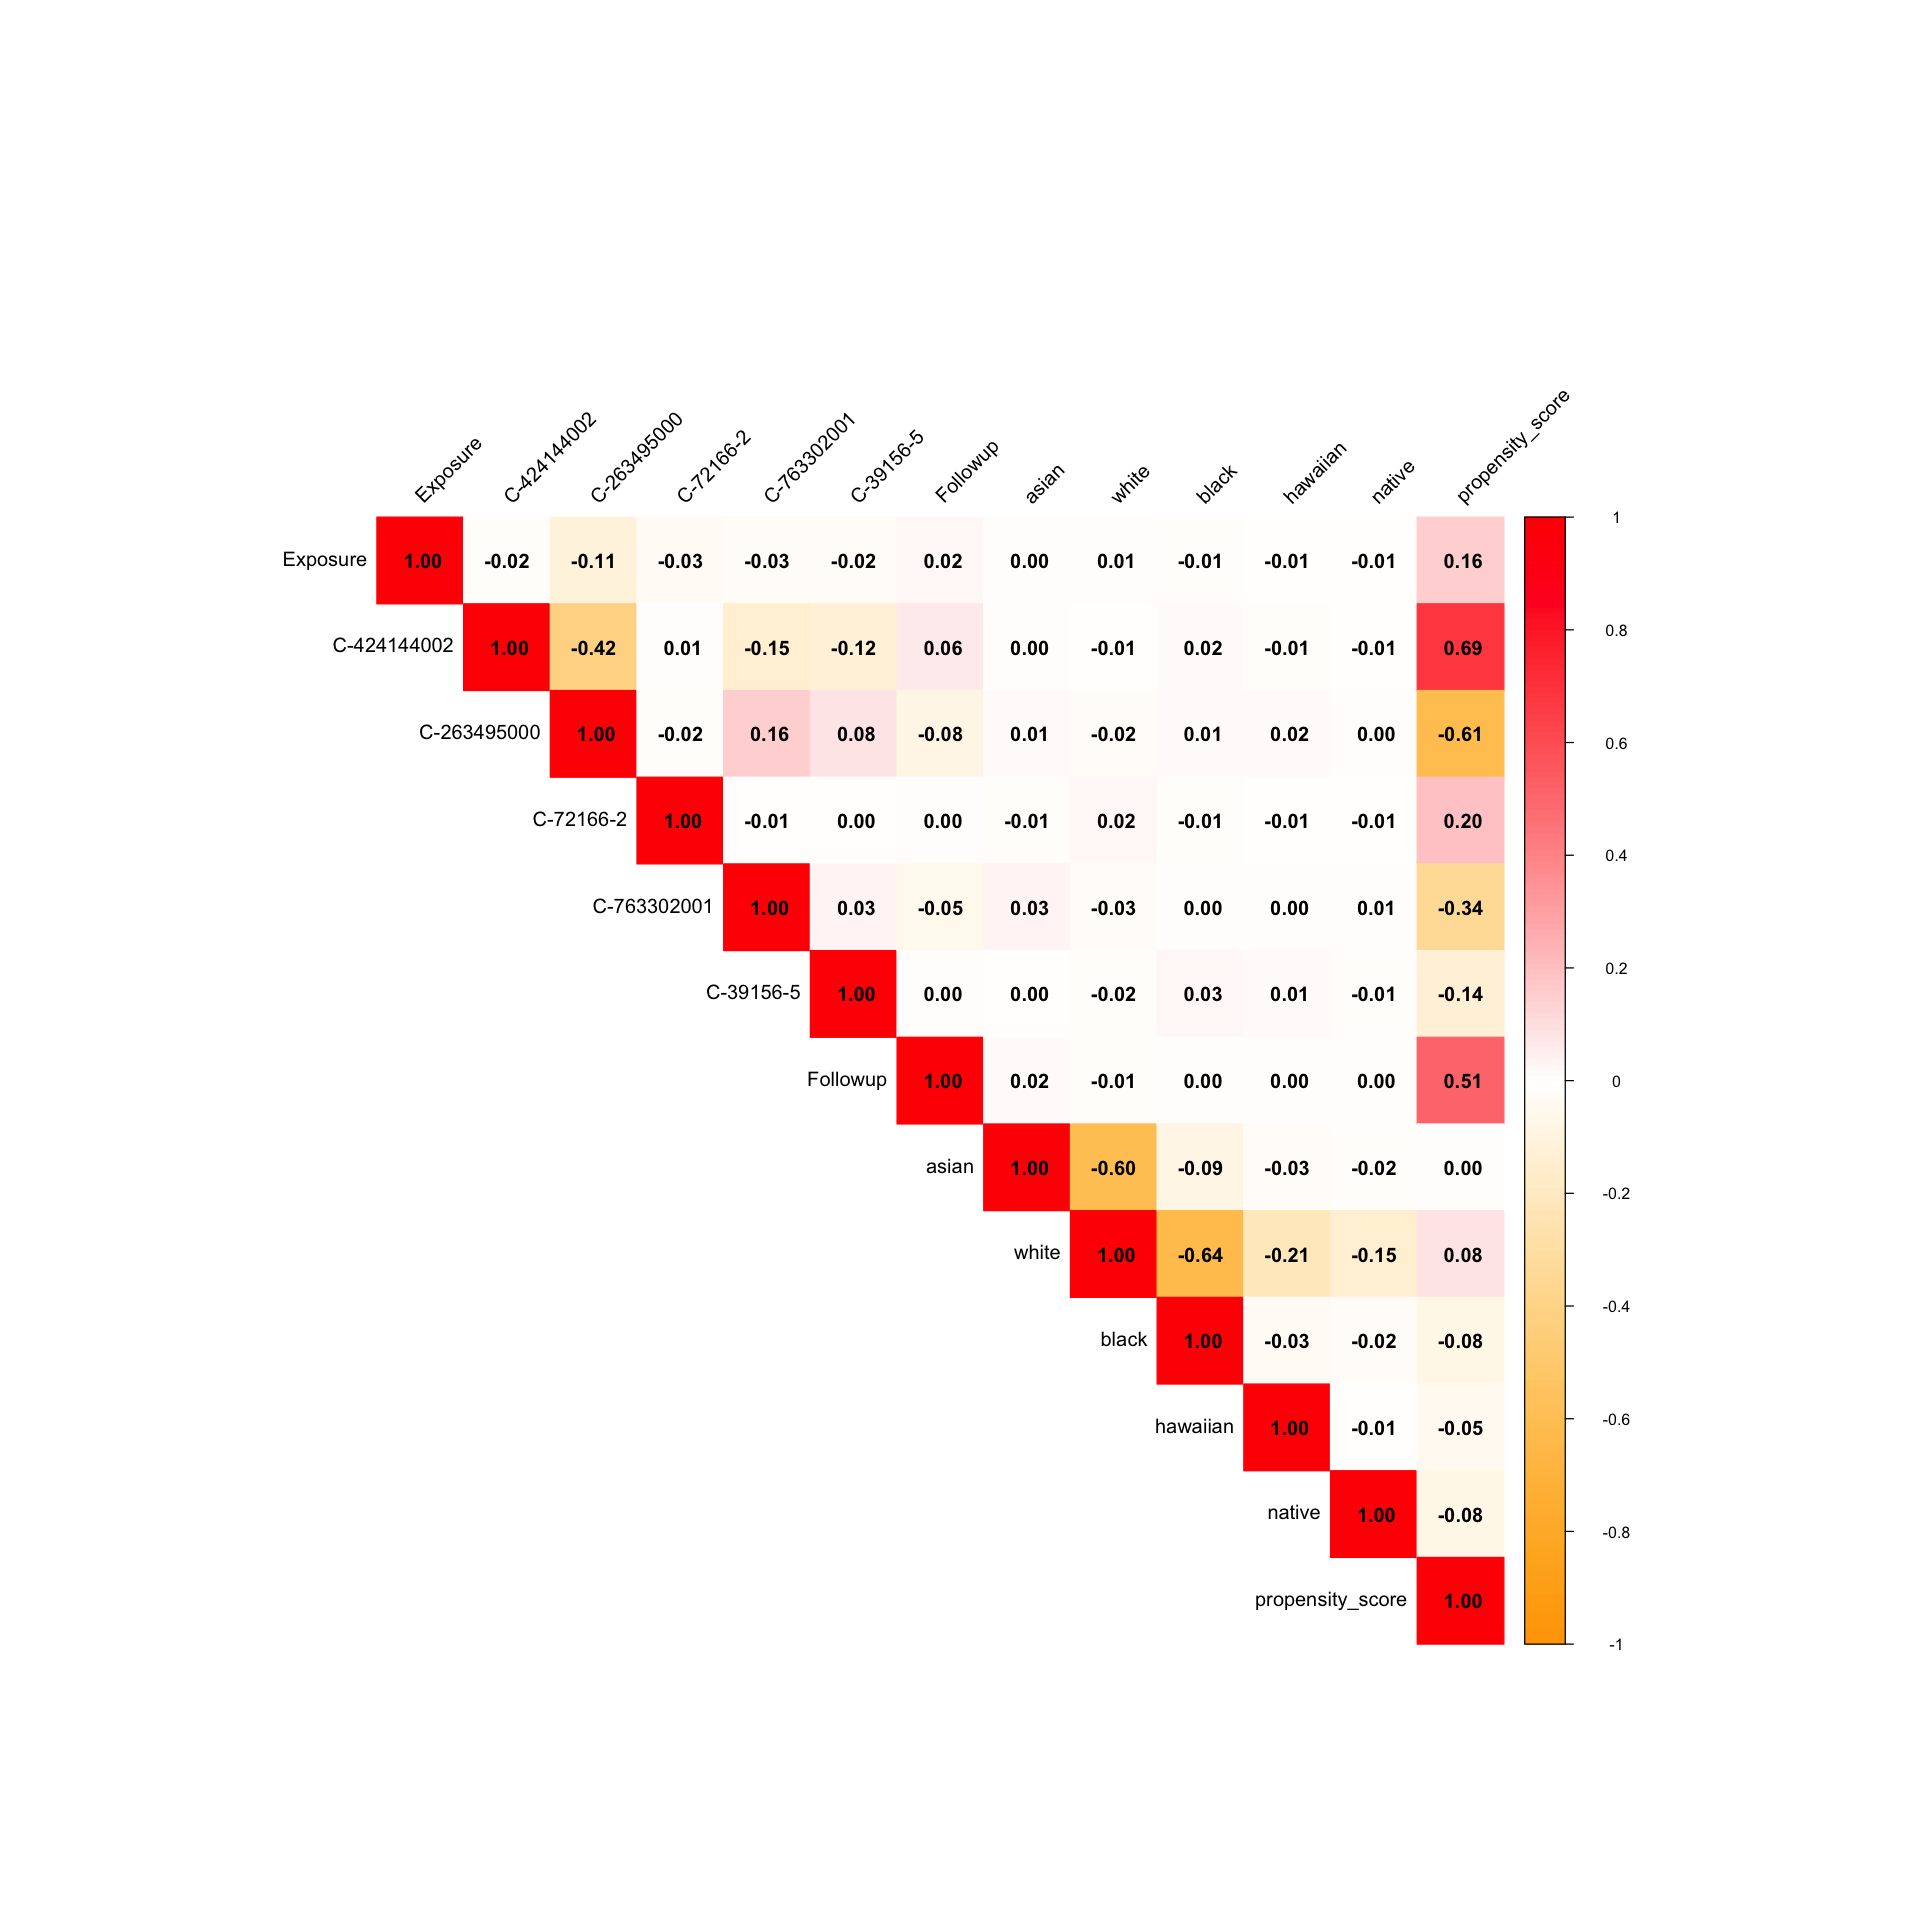

In [195]:
# Compute the correlation matrix
# Resize display for interactive use
options(repr.plot.width = 16, repr.plot.height = 16)

cor_matrix <- cor(Df_regression_unique[, c("Exposure","C-424144002","C-263495000","C-72166-2","C-763302001",
                                           "C-39156-5","Followup","asian","white","black","hawaiian","native",
                                           "propensity_score")])

# Visualize the correlation matrix with colors
corrplot(cor_matrix, method = "color", 
         col = colorRampPalette(c("orange", "white", "red"))(200),
         type = "upper",  # Show only the upper triangle
         addCoef.col = "black",  # Add correlation coefficients
         tl.col = "black",       # Color of text labels
         tl.srt = 45)            # Rotate text labels

png("correlation_plot_high_res.png", width = 1200, height = 800, res = 300)

## Step 6: Variable Selection or Model Replacement (?)
---

1. For the logistic regression there are two variables indicating effect sizes this are propensity score (p-value < 2e-16 ) and C-263495000 (p-value = 0.047120).

2. The top 5 variables based on the ranking of the odds ratio are: propensity score (17556.43% increased odds), Native (58.05% reduced odds), C-263495000 (24.2% reduced odds), C-763302001 (5.2% increased odds), Hawaiian (4.08% reduced odds)

3. The top 5 variables based on feature importance ranking are: propensity score (8.22221067), C-263495000 (1.98521750), native (0.80074216), C-424144002 (0.67939699), C-763302001 (0.47768659).

4. Carefully select the variables based on the VIF.

5. In the correlation matrix, all of the highly important features are correlated, and therefore logistic regression might not be the best model to perform prediction tasks. If the researcher want to include correlated variables into the prediction process then models that makes no assumptions to the relationship between features should be used, such as decision trees or other ensembled methods. Tree based models split features based on impurity measures,hence if two variables are heavily correlated, then no or little information can be gained from splitting on X2 after X1 has been split.

## Step 7: Redo the logistic regression
---

1. Remove variables with high VIF.

2. Reperform feature importance.

In [201]:
# refit the logistic regression model
# Note that I am keeping: C-424144002

logistic_model2 <- glm( `label` ~ `Exposure` + `C-424144002` +`C-263495000` +`C-72166-2` +`C-763302001`+ `C-39156-5` + `Followup` +`hawaiian`+`native`, 
                        binomial(link = "logit"), 
                        data = Df_regression_unique)

# View the model summary
summary(logistic_model2)


Call:
glm(formula = label ~ Exposure + `C-424144002` + `C-263495000` + 
    `C-72166-2` + `C-763302001` + `C-39156-5` + Followup + hawaiian + 
    native, family = binomial(link = "logit"), data = Df_regression_unique)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -6.892e+00  6.587e-01 -10.463  < 2e-16 ***
Exposure       2.864e-01  7.938e-02   3.609 0.000308 ***
`C-424144002`  9.015e-02  5.212e-03  17.297  < 2e-16 ***
`C-263495000` -1.193e+00  9.488e-02 -12.571  < 2e-16 ***
`C-72166-2`    5.482e-01  6.611e-02   8.293  < 2e-16 ***
`C-763302001` -4.852e-01  8.100e-02  -5.990  2.1e-09 ***
`C-39156-5`   -2.996e-02  1.789e-02  -1.675 0.093975 .  
Followup       5.714e-04  3.389e-05  16.860  < 2e-16 ***
hawaiian      -6.018e-01  3.723e-01  -1.617 0.105981    
native        -2.407e+00  1.032e+00  -2.333 0.019642 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null dev

## Step 8: Creating another feature importance
---

Rank the features of the new logistic regression model, then remove unimportant features.

In [204]:
# Compute variable importance
importance_metrics2 <- varImp(logistic_model2, scale = FALSE)
# Convert to data frame if it is not already one
importance_df2 <- as.data.frame(importance_metrics2)
# Transform row names to a new column named "Index" and reset row names
importance_df2 <- rownames_to_column(importance_df2, var = "Features")
# Sort by a specific column in ascending order
sorted_df2 <- importance_df2[order(-importance_df2$Overall), ]
print(sorted_df2)

       Features   Overall
2 `C-424144002` 17.296870
7      Followup 16.859591
3 `C-263495000` 12.570868
4   `C-72166-2`  8.293216
5 `C-763302001`  5.990019
1      Exposure  3.608586
9        native  2.333115
6   `C-39156-5`  1.674794
8      hawaiian  1.616524


## Step 9: Recheck for multicollinearity of the new model
---

In [206]:
vif(logistic_model2)

Exposure `C-424144002` `C-263495000`   `C-72166-2` `C-763302001` 
     1.014492      1.076341      1.070640      1.016555      1.019114 
  `C-39156-5`      Followup      hawaiian        native 
     1.007756      1.008221      1.001007      1.000370

## Step 9: Refit a new logistic regression model
---

Refit another logistic regression model containing only the important important features

In [207]:
# refitting another logistic regression
# removing unimportant feature
logistic_model3 <- glm( `label` ~ `Exposure` + `C-424144002` +`C-263495000` +`C-72166-2` +`C-763302001` + `Followup`+`native`, 
                        binomial(link = "logit"), 
                        data = Df_regression_unique)

# View the model summary
summary(logistic_model3)


Call:
glm(formula = label ~ Exposure + `C-424144002` + `C-263495000` + 
    `C-72166-2` + `C-763302001` + Followup + native, family = binomial(link = "logit"), 
    data = Df_regression_unique)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -7.805e+00  3.826e-01 -20.397  < 2e-16 ***
Exposure       2.890e-01  7.931e-02   3.644 0.000269 ***
`C-424144002`  9.092e-02  5.195e-03  17.501  < 2e-16 ***
`C-263495000` -1.198e+00  9.482e-02 -12.630  < 2e-16 ***
`C-72166-2`    5.479e-01  6.606e-02   8.293  < 2e-16 ***
`C-763302001` -4.856e-01  8.092e-02  -6.001 1.96e-09 ***
Followup       5.698e-04  3.386e-05  16.830  < 2e-16 ***
native        -2.388e+00  1.031e+00  -2.316 0.020579 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 7104.5  on 5935  degrees of freedom
Residual deviance: 5674.2  on 5928  degrees of freedom
AIC: 5690.2

Number of Fisher Scoring ite

## Discussion
---

Variable importance is a critical concept in understanding and interpreting models, especially in fields like epidemiological research, where the focus is often on identifying relationships between exposures, confounders, and outcomes.

----
1. Definition and Purpose of Variable Importance

Variable importance measures quantify the contribution of each predictor to a model's performance. In epidemiology, these measures help:

    a. Identify key risk factors or exposures.
    
    b. Understand the relative impact of different predictors.
    
    c. Simplify models by identifying and excluding unimportant variables.
    
    d. Communicate results to stakeholders and guide public health policies.
    
---

2. Importance in Model Interpretation

    a. Identifying Key Predictors
    
        Variable importance highlights the most influential predictors of an outcome, aiding in:

            - Risk Factor Identification: Identifying exposures (e.g., smoking, pollution) that strongly influence health outcomes (e.g., lung cancer).

            - Confounder Detection: Recognizing variables that significantly alter the effect of an exposure on an outcome.
        
    b. Simplifying Complex Models
    
        In epidemiological research, datasets often contain many variables (e.g., demographic, clinical, environmental). Variable importance:

            - Helps focus on predictors that matter the most.

            - Reduces overfitting by excluding unimportant variables.
        
    c. Prioritizing Variables for Intervention
    
        By quantifying importance, researchers can:

            - Prioritize actionable predictors for intervention (e.g., reducing pollution to lower asthma prevalence).
            - Allocate resources efficiently based on the most impactful factors.
            
---

3. Role in Decision-Making

    a. Policy Formulation
    
        High-Importance Variables: Exposures or factors identified as highly important can guide health policies. For example, if air quality is a strong predictor of respiratory illnesses, policies might focus on emission control.
        Low-Importance Variables: Variables with negligible importance can be deprioritized in policy-making.
    
    b. Resource Allocation
    
        Variable importance informs decision-makers where to focus limited resources:

            - High-impact factors get priority in research funding or intervention strategies.

            - Unimportant factors might warrant less focus unless new evidence arises.
            
    c. Health Equity
    
        - Variable importance can reveal disparities (e.g., socioeconomic status as a key predictor of disease outcomes), helping to address health inequities.
        
---

4. Key Challenges in Using Variable Importance

    a. Interpretation Complexity
    
        - Multicollinearity: In highly correlated variables, importance scores can be misleading, as the importance of one variable might depend on others.
        
        - Interactions: Models without interaction terms may undervalue variables that interact strongly with others.
        
    b. Context Dependency
    
        - Importance scores depend on the model and data. For example, a variable’s importance might vary across subpopulations or regions.
        
    c. Over-Reliance on Automated Metrics
    
        - In epidemiology, relying solely on automated measures (e.g., from varImp() or tree-based models) may overlook domain-specific knowledge.
        
        - Variables with low importance scores might still have causal significance if they mediate or moderate other relationships.

# Question 4: Interaction Terms
---

Incorporate interaction terms into the logistic regression model to examine potential effect modification between exposure and key predictors. Visualize the predicted probabilities for these interactions and discuss their implications for understanding complex relationships in the data.

---

Incorporating interaction terms into a logistic regression model allows you to examine potential effect modification (interaction effects) between an exposure and key predictors. This approach helps determine whether the relationship between an exposure and the outcome depends on the level of another variable.

---

We want to examine whether the effect of Exposure on Outcome is modified by the other predictors.

## Step 0: Create a logistic regression with interaction terms
---

In [196]:
# Fit the logistic regression model
interaction_model <- glm( `label` ~ `Exposure` + `Exposure`*`C-424144002` +`Exposure`*`C-263495000` +`Exposure`*`C-72166-2` +`Exposure`*`C-763302001`+ `Exposure`*`C-39156-5` + `Exposure`*`Followup` + `Exposure`*`asian` +`Exposure`*`white` +`Exposure`*`black` +`Exposure`*`hawaiian`+`Exposure`*`native`+`Exposure`*`propensity_score`, 
                        binomial(link = "logit"), 
                        data = Df_regression_unique)

# View the model summary
summary(interaction_model)


Call:
glm(formula = label ~ Exposure + Exposure * `C-424144002` + Exposure * 
    `C-263495000` + Exposure * `C-72166-2` + Exposure * `C-763302001` + 
    Exposure * `C-39156-5` + Exposure * Followup + Exposure * 
    asian + Exposure * white + Exposure * black + Exposure * 
    hawaiian + Exposure * native + Exposure * propensity_score, 
    family = binomial(link = "logit"), data = Df_regression_unique)

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -5.235e+00  1.094e+00  -4.786 1.71e-06 ***
Exposure                   3.364e+00  1.913e+00   1.759 0.078603 .  
`C-424144002`              4.472e-02  1.499e-02   2.983 0.002850 ** 
`C-263495000`             -7.057e-01  1.854e-01  -3.806 0.000141 ***
`C-72166-2`                2.954e-01  1.136e-01   2.601 0.009305 ** 
`C-763302001`             -2.212e-01  1.284e-01  -1.722 0.085000 .  
`C-39156-5`                9.101e-03  2.154e-02   0.423 0.672595    
Followup               

## Step 1: Assess the significance of interaction terms
---
a. Check the p-values of the interaction terms:

    1. Significant p-value (< 0.05): Indicates evidence of effect modification.
    2. Non-significant p-value (> 0.05): Suggests no strong evidence of interaction.

b. If the interaction terms are significant, retain them. Otherwise, consider excluding them for simplicity.

c. Remove interactions that do not have impact on the model.

In [197]:
# Fit the logistic regression model
interaction_model2 <- glm( `label` ~ `Exposure` + `Exposure`*`C-424144002` +`Exposure`*`C-263495000` +`Exposure`*`C-72166-2` +`Exposure`*`C-763302001`, 
                        binomial(link = "logit"), 
                        data = Df_regression_unique)

# View the model summary
summary(interaction_model2)


Call:
glm(formula = label ~ Exposure + Exposure * `C-424144002` + Exposure * 
    `C-263495000` + Exposure * `C-72166-2` + Exposure * `C-763302001`, 
    family = binomial(link = "logit"), data = Df_regression_unique)

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -7.803168   0.438821 -17.782  < 2e-16 ***
Exposure                3.624698   0.774090   4.683 2.83e-06 ***
`C-424144002`           0.109747   0.006171  17.784  < 2e-16 ***
`C-263495000`          -1.459638   0.107647 -13.559  < 2e-16 ***
`C-72166-2`             0.655636   0.074551   8.794  < 2e-16 ***
`C-763302001`          -0.599051   0.090910  -6.590 4.41e-11 ***
Exposure:`C-424144002` -0.053339   0.010854  -4.914 8.92e-07 ***
Exposure:`C-263495000`  1.150783   0.227823   5.051 4.39e-07 ***
Exposure:`C-72166-2`   -0.469913   0.148627  -3.162  0.00157 ** 
Exposure:`C-763302001`  0.423807   0.181795   2.331  0.01974 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.0

### Interpretation:
---

The coefficients indicate how the effect of exposure on outcome changes with the retained features:

1. Coefficient of Exposure:C-424144002 is -0.053339 suggests that the effect of exposure weakens slightly as C-424144002 increases

2. Coefficient of Exposure:C-263495000 is 1.150783 suggests that the effect of exposure increases as C-263495000 increases

3. Coefficient of Exposure:C-72166-2 is -0.469913 suggests that the effect of exposure weakens slightly as C-72166-2 increases

4. Coefficient of Exposure:C-763302001 is 0.423807 suggests that the effect of exposure increases slightly as C-C-763302001 increases

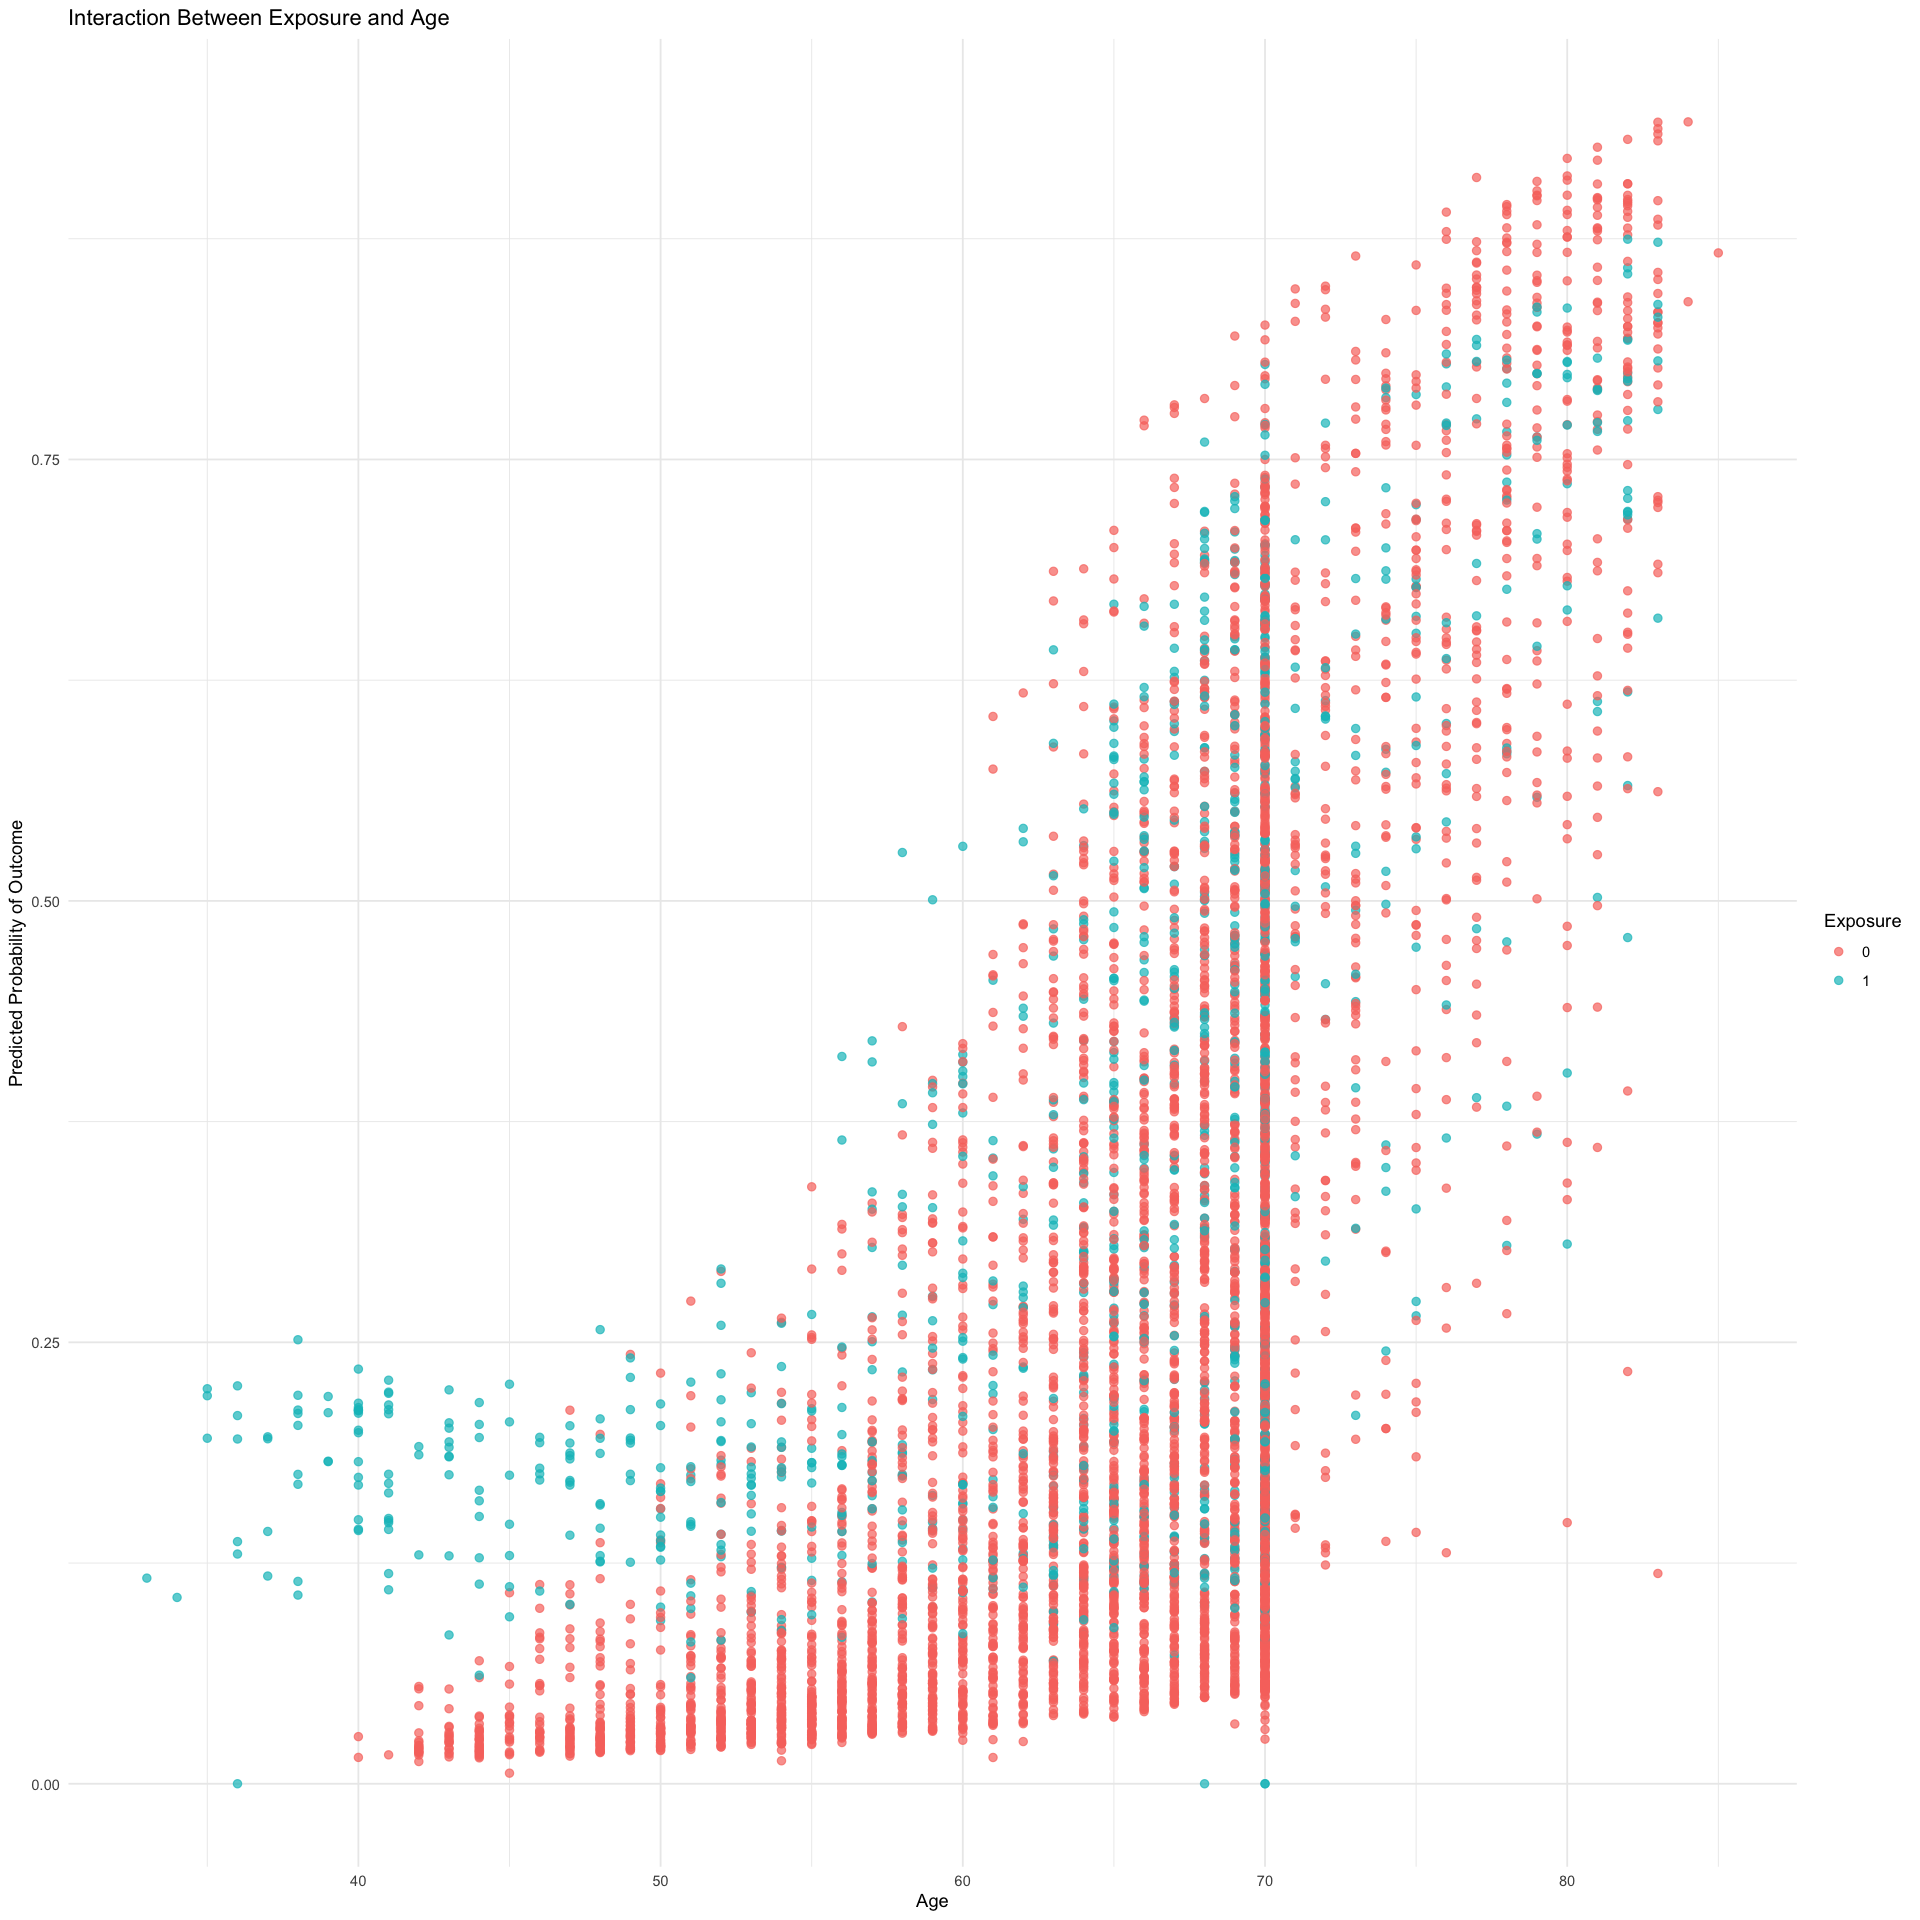

In [212]:
# Predict probabilities
Df_regression_unique$predicted_prob <- predict(interaction_model, type = "response")

# Plot interaction effect of Age as scatterplot
ggplot(Df_regression_unique, aes(x = `C-424144002`, y = predicted_prob, color = as.factor(Exposure))) +
  geom_point(size = 2, alpha = 0.7) +  # Scatterplot points with custom size and transparency
  labs(title = "Interaction Between Exposure and Age",
       x = "Age",
       y = "Predicted Probability of Outcome",
       color = "Exposure") +
  theme_minimal()
